## Exercise 2- Logistic Regression

In [1]:
# import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
input_file = 'database/ex2data1.txt'
column_values = np.loadtxt(input_file,delimiter=',',usecols=(0,1,2),unpack=True)

# creating X & y matrices as suggested in the course
X = np.transpose(np.array(column_values[:-1]))
y = np.transpose(np.array(column_values[-1:]))

# getting training set length
m = y.size 

# insert ones to X (x0)
X = np.insert(X,0,1,axis=1)

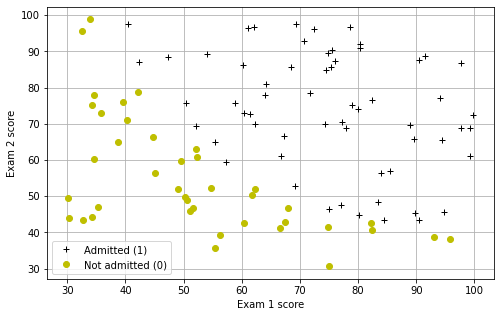

In [3]:
# plotting the data
# dividing the data as per ones and zeros
positive = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
negative = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

def plotData():
    plt.figure(figsize=(8,5))
    plt.plot(positive[:,1],positive[:,2],'k+',label='Admitted (1)')
    plt.plot(negative[:,1],negative[:,2],'yo',label='Not admitted (0)')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plotData()

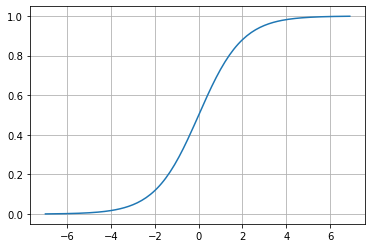

In [4]:
# importing the vectorized sigmoid function
from scipy.special import expit 
tempx = np.arange(-7,7,.1)
plt.plot(tempx,expit(tempx))

# proof that it is the sigmoid function indeed
plt.grid(True)

In [5]:
# hypothesis & cost function for logistic regression
# defining the logistic hypothesis function
def h(mytheta,X): 
    return expit(np.dot(X,mytheta))

# cost function (default lambda (regularization) 0)
def computeCost(theta,X,y,_lambda = 0.): 
    """
    theta_initial: n-dimensional vector of initial theta guess
    n: number of features
    m: number of training examples provided
    X: matrix with n-columns and m-rows
    y: m-dimensional vector
    Note: This includes Regularization if you set _lambda to NOT zero
    Note (Contd): For the first part of this exercise, the _lambda is 0. No Regularization.
    """
    
    temp1 = np.dot(-np.array(y).T,np.log(h(theta,X)))
    temp2 = np.dot((1-np.array(y)).T,np.log(1-h(theta,X)))
    regularization_term = (_lambda/2) * np.sum(np.dot(theta[1:].T,theta[1:])) # ignore theta 0
    return float( (1./m) * ( np.sum(temp1 - temp2) + regularization_term ) )

In [6]:
initial_theta = np.zeros((X.shape[1],1))
computeCost(initial_theta,X,y) # cost with all zeros

0.6931471805599453

In [7]:
# Python alternative for Octave's fminunc (for optimization)
from scipy import optimize

def optimizeTheta(theta,X,y,_lambda=0.):
    result = optimize.fmin(computeCost, x0=theta, args=(X, y, _lambda), maxiter=500, full_output=True)
    return result[0], result[1]

# checking optimization results
theta, mincost = optimizeTheta(initial_theta,X,y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [8]:
# calling the cost function on optimized theta value
computeCost(theta,X,y)

0.20349770159021513

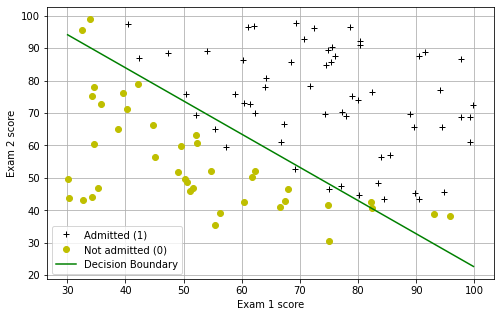

In [9]:
# plotting the decision boundary
x_boundary = np.array([np.min(X[:,1]), np.max(X[:,1])])
y_boundary = (-1./theta[2])*(theta[0] + theta[1]*x_boundary)
plotData()
plt.plot(x_boundary,y_boundary,'g-',label='Decision Boundary')
plt.legend()

In [10]:
# checking for exam score 1 = 82, exam score 2 = 76
print(h(theta,np.array([1,82,76])))

0.9991432475894193


In [11]:
def makePrediction(theta,x):
    return h(theta,x) >= 0.5

# accuracy check
correct_positives = float(np.sum(makePrediction(theta,positive)))
correct_negatives = float(np.sum(np.invert(makePrediction(theta,negative))))
total = len(positive)+len(negative)
correct_percentage = float(correct_positives+correct_negatives)/total
print("Accuracy: %f" % correct_percentage)

Accuracy: 0.890000


### Regularized Logistic Regression

In [12]:
input_file = 'database/ex2data2.txt'
column_values = np.loadtxt(input_file,delimiter=',',usecols=(0,1,2),unpack=True)

# creating X & y matrices as suggested in the course
X = np.transpose(np.array(column_values[:-1]))
y = np.transpose(np.array(column_values[-1:]))

# getting training set length
m = y.size 

# insert ones to X (x0)
X = np.insert(X,0,1,axis=1)

<Figure size 576x576 with 0 Axes>

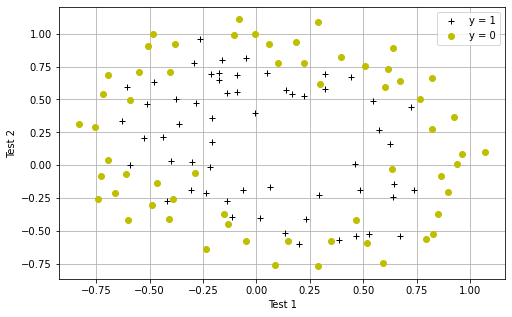

In [13]:
# plotting the data
# dividing the data as per ones and zeros
positive = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
negative = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

def plotData():
    plt.figure(figsize=(8,5))
    plt.plot(positive[:,1],positive[:,2],'k+',label='y = 1')
    plt.plot(negative[:,1],negative[:,2],'yo',label='y = 0')
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.legend()
    plt.grid(True)

plt.figure(figsize=(8,8))
plotData()

In [14]:
# feature mapping
def mapFeatures(x1, x2):
    """ 
    Function that takes in a column of n-x1's, a column of n-x2s, and builds
    a n-x28-dim matrix of featuers as described in the assignment
    """
    degree = 6
    out = np.ones( (x1.shape[0], 1) )

    for i in range(1, degree+1):
        for j in range(0, i+1):
            temp1 = x1 ** (i-j)
            temp2 = x2 ** (j)
            final_term  = (temp1 * temp2).reshape(temp1.shape[0], 1) 
            out   = np.hstack((out, final_term))
    return out

In [15]:
# creating a feature-mapped X matrix
X_mapped = mapFeatures(X[:,1],X[:,2])
X_mapped

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01, ...,
         6.29470940e-04,  8.58939846e-03,  1.17205992e-01],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01, ...,
         1.89305413e-03, -1.39810280e-02,  1.03255971e-01],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01, ...,
         1.04882142e-02, -3.39734512e-02,  1.10046893e-01],
       ...,
       [ 1.00000000e+00, -4.84450000e-01,  9.99270000e-01, ...,
         2.34007252e-01, -4.82684337e-01,  9.95627986e-01],
       [ 1.00000000e+00, -6.33640000e-03,  9.99270000e-01, ...,
         4.00328554e-05, -6.31330588e-03,  9.95627986e-01],
       [ 1.00000000e+00,  6.32650000e-01, -3.06120000e-02, ...,
         3.51474517e-07, -1.70067777e-08,  8.22905998e-10]])

In [16]:
# cost function same as unregularized
initial_theta = np.zeros((X_mapped.shape[1],1))
computeCost(initial_theta,X_mapped,y)

0.6931471805599454

In [17]:
# optimization 
# leveraging BFGS 
def optimizeRegularizedTheta(theta,X,y,_lambda=0):
    result = optimize.minimize(computeCost, theta, args=(X, y, _lambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,X_mapped,y)

In [18]:
def plotBoundary(theta, X, y, _lambda=0.):
    """
    Function to plot the decision boundary for arbitrary theta, X, y, & lambda value
    Feature mapping, and the minimization code included
    """
    theta, mincost = optimizeRegularizedTheta(theta,X,y,_lambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            featuresij = mapFeatures(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,featuresij.T)
    zvals = zvals.transpose()

    u, v = np.meshgrid(xvals, yvals)
    contour = plt.contour(xvals, yvals, zvals, [0])
    
    fmt = { 0:'Lambda = %d'%_lambda}
    plt.clabel(contour, inline=1, fontsize=15, fmt=fmt)
    plt.title("Decision Boundary")

<Figure size 576x576 with 0 Axes>

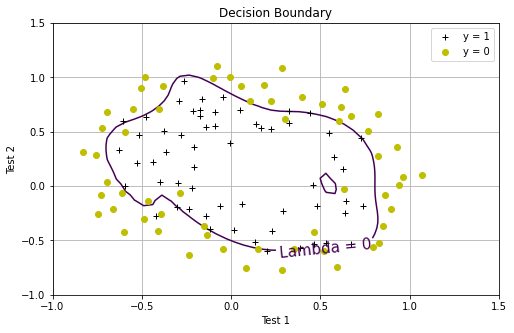

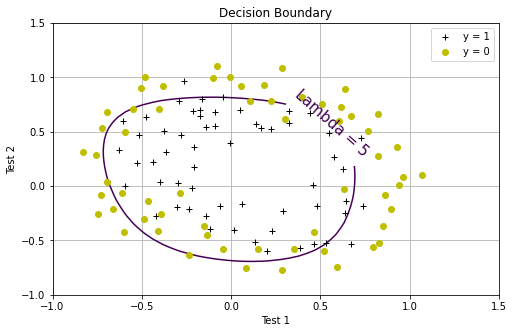

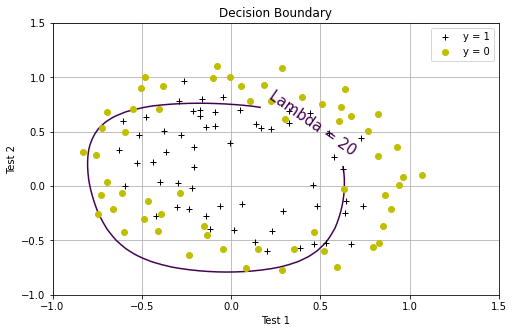

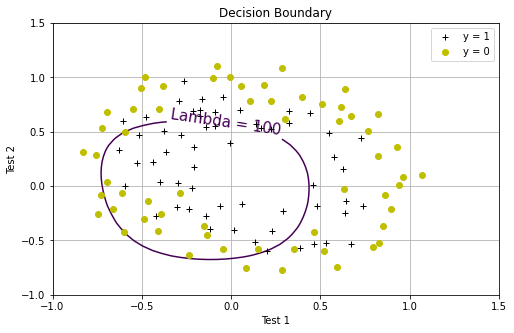

In [19]:
# building a figure showing contours for various values of regularization parameter, lambda
# note that for lambda = 0: overfitting, and for lambda = 100: underfitting
plt.figure(figsize=(8,8))
plotData()
plotBoundary(theta,X_mapped,y,0)

plotData()
plotBoundary(theta,X_mapped,y,5)

plotData()
plotBoundary(theta,X_mapped,y,20)


plotData()
plotBoundary(theta,X_mapped,y,100)